In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import pyro
import numpy as np
import pylab as pl
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pyro
from pyro import distributions as dist
from pyro.infer.mcmc import MCMC, HMC, NUTS
import seaborn as sns
import matplotlib.pyplot as plt
from pyro.infer import SVI, Trace_ELBO, Predictive

sns.set_theme()

from scripts import *
from models import *

In [3]:
data = pd.read_csv("../Datasets/Avocado_prices_2020/avocado-updated-2020.csv", sep=",")

In [69]:
data.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
78,2015-01-04,1.13,109215.00,48285.15,37562.78,34.10,23332.97,21582.97,1750.00,0.0,conventional,2015,Roanoke
77,2015-01-04,1.54,4212.16,238.48,1678.83,372.55,1922.30,1570.28,352.02,0.0,organic,2015,Richmond/Norfolk
76,2015-01-04,1.13,182697.97,56293.75,80396.09,9762.41,36245.72,31778.36,4467.36,0.0,conventional,2015,Richmond/Norfolk
75,2015-01-04,2.01,3397.00,58.22,1493.90,772.21,1072.67,993.94,78.73,0.0,organic,2015,Raleigh/Greensboro


In [70]:
data.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [71]:
data = data.sort_values(["date"], ascending=[True]) 

In [72]:
avocado_us = data[data["geography"]=="Total U.S."]

## Plots
* Region by avocado sales (maybe with year by year change in sales)

## Analysis
* Predict 

In [155]:
def moving_average(x, w=21):
    return np.convolve(x, np.ones(w), 'same') / w

def plot_series(data, y_label=None, w=1):
    for column in data:
        if column != "date":
            x = pd.to_datetime(data["date"])
            y = moving_average(data[column], w)
            pl.plot_date(x, y, "-", label=column)
    pl.legend()
    pl.xlabel("Date")
    pl.ylabel(y_label)

def sum_columns(data, columns, name):
    data[name] = data[columns].sum(axis=1)


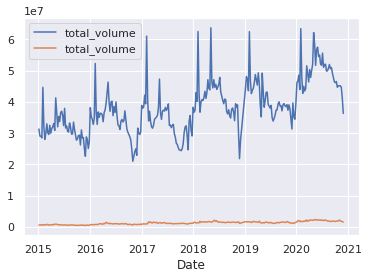

In [161]:
# Total avocados sold over time
plot_series(avocado_us[avocado_us["type"]=="conventional"][["date", "total_volume"]])
plot_series(avocado_us[avocado_us["type"]=="organic"][["date", "total_volume"]])

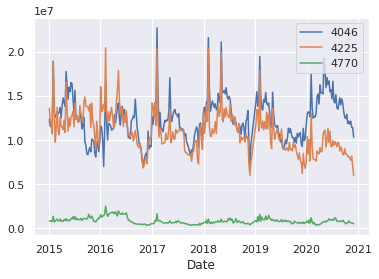

In [156]:
# Avocados sold by type over time
plot_series(avocado_us[avocado_us["type"]=="conventional"][["date", "4046", "4225", "4770"]])

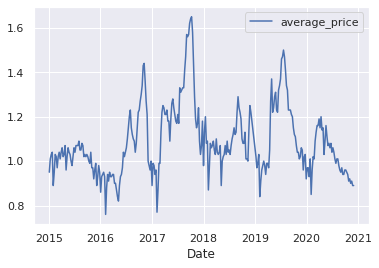

In [159]:
# Avocado price over time
plot_series(avocado_us[avocado_us["type"]=="conventional"][["date", "average_price"]])